In [14]:
from dataset import load_data, load_data_blurred
from models import EfficientNetModel
from helper_functions import train

In [15]:
# Loading data
train_loader, validation_loader = load_data_blurred()

Number of train examples: 17950
Number of evaluation examples: 4460
Done loading data...


In [16]:
# creating a model
model = EfficientNetModel(num_classes=5)

Device used: cuda
Epoch 1/10 done in 21.38 seconds ; Train Loss: 0.2285
Validation Loss: 0.0503, Validation Accuracy: 0.9800
---
Epoch 2/10 done in 21.15 seconds ; Train Loss: 0.1502
Validation Loss: 0.0222, Validation Accuracy: 1.0000
---
Epoch 3/10 done in 20.84 seconds ; Train Loss: 0.1185
Validation Loss: 0.3550, Validation Accuracy: 0.8500
---
Epoch 4/10 done in 20.86 seconds ; Train Loss: 0.1023
Validation Loss: 0.0020, Validation Accuracy: 1.0000
---
Epoch 5/10 done in 20.50 seconds ; Train Loss: 0.0850
Validation Loss: 0.0093, Validation Accuracy: 1.0000
---
Epoch 6/10 done in 20.55 seconds ; Train Loss: 0.0739
Validation Loss: 0.0667, Validation Accuracy: 0.9800
---
Epoch 7/10 done in 20.48 seconds ; Train Loss: 0.0654
Validation Loss: 0.0024, Validation Accuracy: 1.0000
---
Epoch 8/10 done in 20.72 seconds ; Train Loss: 0.0596
Validation Loss: 0.0009, Validation Accuracy: 1.0000
---
Epoch 9/10 done in 20.78 seconds ; Train Loss: 0.0548
Validation Loss: 0.0162, Validation Accu

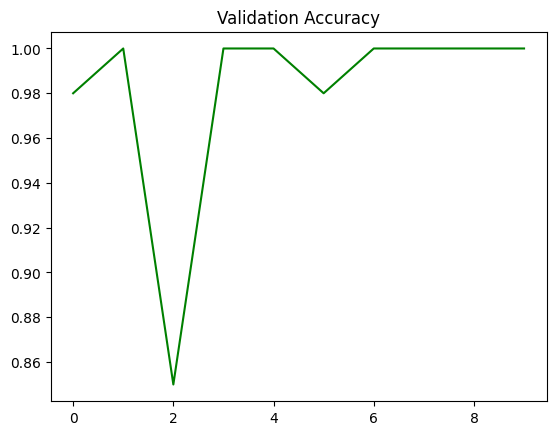

In [17]:
# training the model
trained_model = train(model.model, train_loader, validation_loader)

In [18]:
model.model = trained_model

In [19]:
# drop gaussian kernel classifier from the model and add original classifier to end of feature extraction part.
model.replace_classifier(num_classes=15)
model.set_trainable(freeze_feature_extraction=True)

In [20]:
# Loading data
train_loader, validation_loader = load_data()

Number of train examples: 3590
Number of evaluation examples: 892
Done loading data...


Device used: cuda


C:\Users\centu\PycharmProjects\ANN_project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\centu\PycharmProjects\ANN_project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\centu\PycharmProjects\ANN_project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

Epoch 1/10 done in 9.68 seconds ; Train Loss: 2.3040
Validation Loss: 2.1611, Validation Accuracy: 0.2400
---


C:\Users\centu\PycharmProjects\ANN_project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\centu\PycharmProjects\ANN_project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\centu\PycharmProjects\ANN_project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

Epoch 2/10 done in 8.88 seconds ; Train Loss: 2.2297
Validation Loss: 2.0711, Validation Accuracy: 0.2900
---
Epoch 3/10 done in 8.84 seconds ; Train Loss: 2.1488
Validation Loss: 2.0409, Validation Accuracy: 0.3400
---
Epoch 4/10 done in 8.92 seconds ; Train Loss: 2.1117
Validation Loss: 2.0091, Validation Accuracy: 0.3500
---
Epoch 5/10 done in 8.96 seconds ; Train Loss: 2.0973
Validation Loss: 2.0072, Validation Accuracy: 0.3200
---
Epoch 6/10 done in 8.87 seconds ; Train Loss: 2.0730
Validation Loss: 1.9775, Validation Accuracy: 0.3500
---


C:\Users\centu\PycharmProjects\ANN_project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\centu\PycharmProjects\ANN_project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\centu\PycharmProjects\ANN_project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

Epoch 7/10 done in 8.92 seconds ; Train Loss: 2.0558
Validation Loss: 2.0036, Validation Accuracy: 0.3600
---


C:\Users\centu\PycharmProjects\ANN_project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\centu\PycharmProjects\ANN_project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\centu\PycharmProjects\ANN_project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

Epoch 8/10 done in 8.88 seconds ; Train Loss: 2.0507
Validation Loss: 1.9605, Validation Accuracy: 0.3500
---
Epoch 9/10 done in 9.45 seconds ; Train Loss: 2.0367
Validation Loss: 1.9213, Validation Accuracy: 0.3700
---
Epoch 10/10 done in 9.76 seconds ; Train Loss: 2.0306
Validation Loss: 2.0328, Validation Accuracy: 0.3300
---
Training time in Mins :  1.5192500273386638
Train loss values per epoch:
[2.3040079971154532, 2.229694585005442, 2.1488281389077506, 2.111744003991286, 2.0973027368386585, 2.0729572491513357, 2.055840810139974, 2.050676150868336, 2.0367492183491036, 2.0306013683478037]


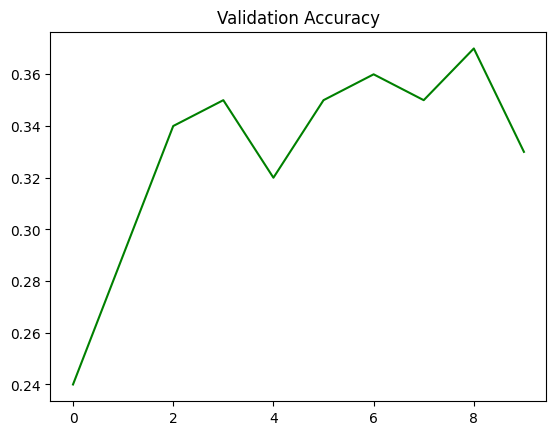

In [21]:
# training the model
trained_model_original_classifier = train(model.model, train_loader, validation_loader)